# TikTok Engagement Analysis: Does Video Duration Matter?
## A/B Testing Video Duration & Engagement

### Objective
This project analyzes whether TikTok videos with longer durations receive significantly higher engagement. Using an A/B testing approach, I compare metrics like **likes, comments, shares, and watch time**.

### Hypothesis
- **H₀ (Null Hypothesis):** Videos with longer durations do not have significantly higher engagement.
- **H₁ (Alternative Hypothesis):** Videos with longer durations have significantly higher engagement.

### Dataset
The dataset is sourced from **Kaggle’s TikTok User Engagement Dataset**.

## 1. Load & Explore Data

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("data/tiktok_dataset.csv")

# Display dataset information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


## 2. Data Cleaning & Preprocessing

In [3]:
# Drop rows with missing values in columns of interest: video_duration_sec, video_view_count, video_like_count, etc.
df_clean = df.dropna(subset=["video_duration_sec", "video_view_count", "video_like_count", "video_share_count", "video_comment_count"])

# Check the shape after cleaning
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


## 3. Visualize the Data

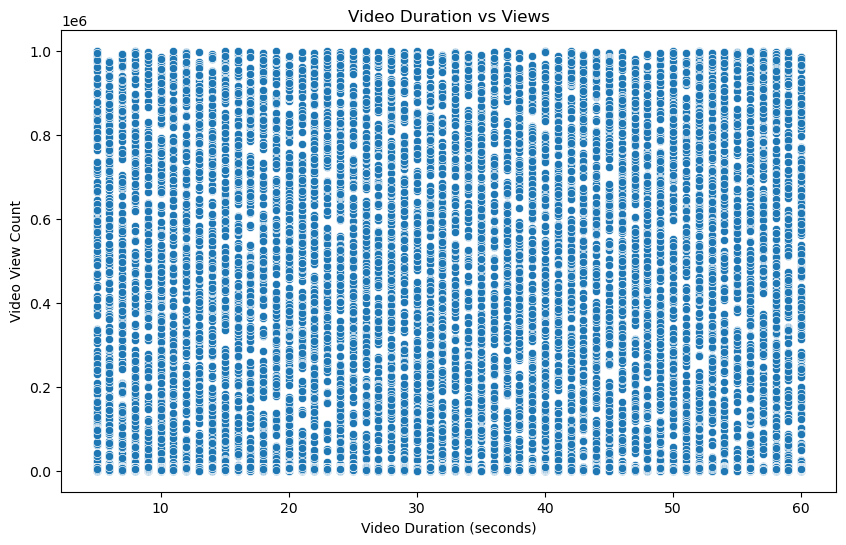

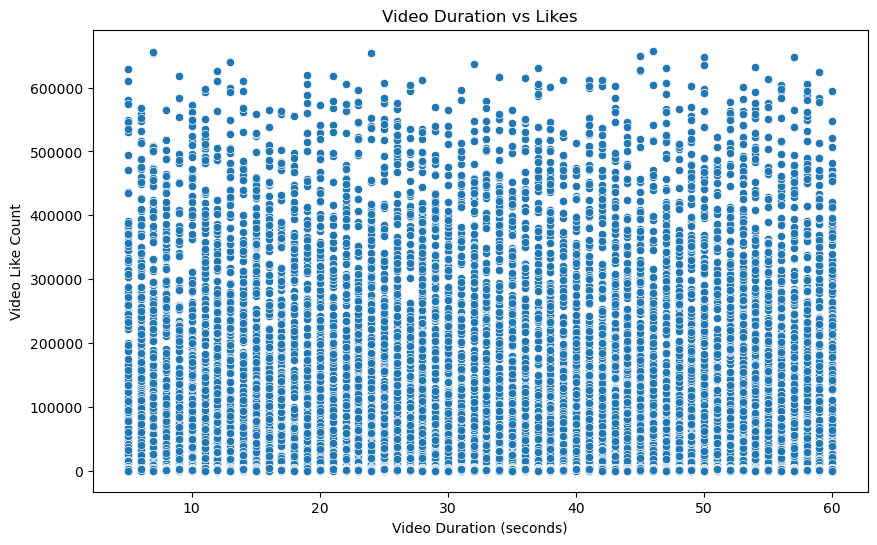

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize relationship between video duration and views
plt.figure(figsize=(10, 6))
sns.scatterplot(x="video_duration_sec", y="video_view_count", data=df_clean)
plt.title("Video Duration vs Views")
plt.xlabel("Video Duration (seconds)")
plt.ylabel("Video View Count")
plt.show()

# Visualize relationship between video duration and likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x="video_duration_sec", y="video_like_count", data=df_clean)
plt.title("Video Duration vs Likes")
plt.xlabel("Video Duration (seconds)")
plt.ylabel("Video Like Count")
plt.show()

## 4. Hypothesis Testing

In [5]:
# Define "long" vs "short" based on the median video duration
median_duration = df_clean["video_duration_sec"].median()

# Split the dataset into short and long duration videos
short_videos = df_clean[df_clean["video_duration_sec"] <= median_duration]
long_videos = df_clean[df_clean["video_duration_sec"] > median_duration]

# Check the size of each group
print(f"Short videos: {len(short_videos)}")
print(f"Long videos: {len(long_videos)}")

Short videos: 9565
Long videos: 9519


## 5. Run t-tests for Engagement Metrics

In [6]:
from scipy.stats import ttest_ind

# Define engagement metrics
metrics = ["video_view_count", "video_like_count", "video_share_count", "video_comment_count"]

# Run t-tests
alpha = 0.05  # significance level

for metric in metrics:
    t_stat, p_value = ttest_ind(short_videos[metric], long_videos[metric], equal_var=False)
    print(f"📊 {metric} - T-stat: {t_stat:.3f}, P-value: {p_value:.5f}")
    
    if p_value < alpha:
        print(f"✅ Significant difference in {metric} between Short and Long duration videos!\n")
    else:
        print(f"❌ No significant difference in {metric} between Short and Long duration videos.\n")

📊 video_view_count - T-stat: 0.072, P-value: 0.94237
❌ No significant difference in video_view_count between Short and Long duration videos.

📊 video_like_count - T-stat: -0.834, P-value: 0.40407
❌ No significant difference in video_like_count between Short and Long duration videos.

📊 video_share_count - T-stat: -0.686, P-value: 0.49279
❌ No significant difference in video_share_count between Short and Long duration videos.

📊 video_comment_count - T-stat: -0.202, P-value: 0.83958
❌ No significant difference in video_comment_count between Short and Long duration videos.



## Key Findings & Conclusion

- **Views:** *Not significant* difference between short and long videos.
- **Likes:** *Not significant* difference between short and long videos.
- **Shares:** *Not significant* difference between short and long videos.
- **Comments:** *Not significant* difference between short and long videos.

### Business Takeaways:
- Video length may not be a major factor for engagement, and other aspects like content quality or timing may be more important.
